# KNN Algorithm
* import dataset
* know dataset
* visualize dataset
* what is k-NN?
* k-NN with sklearn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_csv('data.csv')
data.head() #malignant -- kötü huylu tümör , bening -- iyi huylu tümör

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
M = data[data.diagnosis == 'M']
B = data[data.diagnosis == 'B']

In [6]:
B.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 19 to 568
Data columns (total 31 columns):
diagnosis                  357 non-null object
radius_mean                357 non-null float64
texture_mean               357 non-null float64
perimeter_mean             357 non-null float64
area_mean                  357 non-null float64
smoothness_mean            357 non-null float64
compactness_mean           357 non-null float64
concavity_mean             357 non-null float64
concave points_mean        357 non-null float64
symmetry_mean              357 non-null float64
fractal_dimension_mean     357 non-null float64
radius_se                  357 non-null float64
texture_se                 357 non-null float64
perimeter_se               357 non-null float64
area_se                    357 non-null float64
smoothness_se              357 non-null float64
compactness_se             357 non-null float64
concavity_se               357 non-null float64
concave points_se          357 

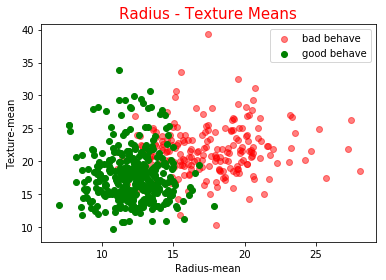

In [7]:
plt.scatter(M.radius_mean, M.texture_mean, color = 'red', label = 'bad behave', alpha = 0.5)
plt.scatter(B.radius_mean, B.texture_mean, color = 'green', label = 'good behave', alpha = 0.5)
plt.xlabel("Radius-mean")
plt.ylabel("Texture-mean")
plt.title("Radius - Texture Means", color = 'red', fontsize = 15)
plt.legend()
plt.show()

In [8]:
data.diagnosis = [1 if each == 'M' else 0 for each in data.diagnosis]
x_data = data.drop('diagnosis', axis = 1 )
y = data.diagnosis.values

In [9]:
#normalization of x features
x = (x_data - np.mean(x_data)) / (np.max(x_data) - np.min(x_data))

In [10]:
#train - test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [11]:
#knn model

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [12]:
pred = knn.predict(x_test)

In [13]:
print("{} nn score : {}".format(3, knn.score(x_test, y_test)))

3 nn score : 0.9707602339181286


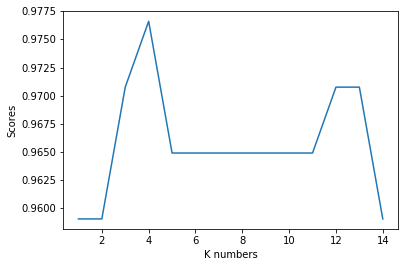

In [14]:
#find k value
scores = []
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train, y_train)
    scores.append(knn2.score(x_test, y_test))

plt.plot(range(1,15), scores)
plt.xlabel("K numbers")
plt.ylabel("Scores")
plt.show()